## Ginzburg-Landau 1D Tensorizing Flow

In [1]:
# import utility functions
import utils
from utils.flow_models import *
from utils.target import *
from utils.training import *

# import pytorch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.distributions.transforms as transform
# set number of threads
torch.set_num_threads(8)

# numerical libs
import scipy
import scipy.io

# import plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import I/O
import os
import sys

# set seed
np.random.seed(8)
torch.manual_seed(0)

def loss_func_init(x, prior_logpdf, targ_logpdf):
        """ evaluate initial KL divergence between posterior distribution (NF + prior) 
        and target. x is samples without flow. This is a Monte-Carlo estimation of the 
        log partition function. """
        return (prior_logpdf - targ_logpdf(x)).mean()

## 1 TF + ResNet

::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
::BacthNormFlow: Using exact stats: gl1d, for initialization. 
[ Before Training ]:: ( KL-Divergence ) = 81.37254802696685


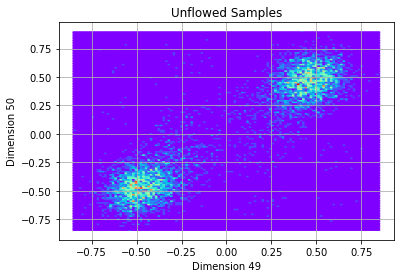

[ #### ]:: In training ...  ... (epoch1=>batch0)
[ #### ]:: In training ...  ... (epoch1=>batch10)
[ #### ]:: In training ...  ... (epoch1=>batch20)
[ #### ]:: In training ...  ... (epoch1=>batch30)
[ #### ]:: In training ...  ... (epoch1=>batch40)
[ #### ]:: In training ...  ... (epoch1=>batch50)
[ #### ]:: In training ...  ... (epoch1=>batch60)
[ #### ]:: In training ...  ... (epoch1=>batch70)
[ #### ]:: In training ...  ... (epoch1=>batch80)
[ #### ]:: In training ...  ... (epoch1=>batch90)
[ #### ]:: In training ...  ... (epoch1=>batch100)
[ #### ]:: In training ...  ... (epoch1=>batch110)
[ #### ]:: In training ...  ... (epoch1=>batch120)
[ #### ]:: In training ...  ... (epoch1=>batch130)
[ #### ]:: In training ...  ... (epoch1=>batch140)
[ #### ]:: In training ...  ... (epoch1=>batch150)


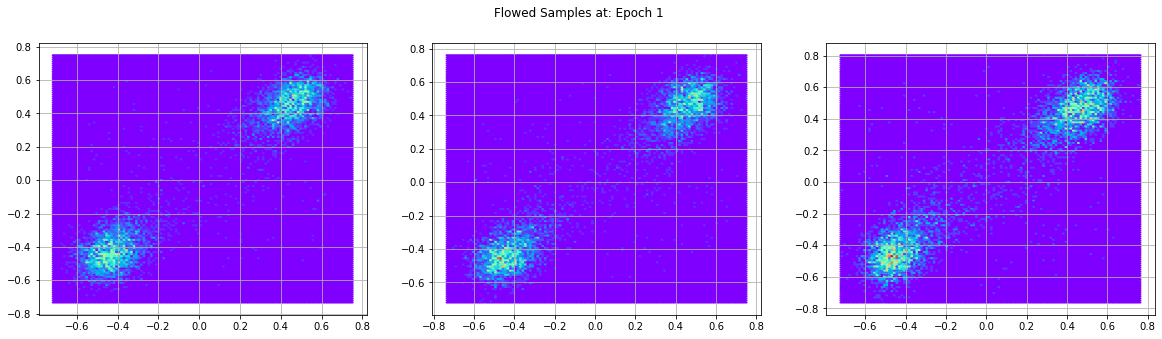

[ Epoch  1 ]:: ( Train Avg. Over Epoch ) = 78.645609114332, ( Generalization ) = 77.11273858193523
[ ======== ]:: Report Learning Rate =  0.0019690405634933492
[ ======== ]:: Report Norm of Gradient =  175.30736072948218
[ #### ]:: In training ...  ... (epoch2=>batch0)
[ #### ]:: In training ...  ... (epoch2=>batch10)
[ #### ]:: In training ...  ... (epoch2=>batch20)
[ #### ]:: In training ...  ... (epoch2=>batch30)
[ #### ]:: In training ...  ... (epoch2=>batch40)
[ #### ]:: In training ...  ... (epoch2=>batch50)
[ #### ]:: In training ...  ... (epoch2=>batch60)
[ #### ]:: In training ...  ... (epoch2=>batch70)
[ #### ]:: In training ...  ... (epoch2=>batch80)
[ #### ]:: In training ...  ... (epoch2=>batch90)
[ #### ]:: In training ...  ... (epoch2=>batch100)
[ #### ]:: In training ...  ... (epoch2=>batch110)
[ #### ]:: In training ...  ... (epoch2=>batch120)
[ #### ]:: In training ...  ... (epoch2=>batch130)
[ #### ]:: In training ...  ... (epoch2=>batch140)
[ #### ]:: In training ..

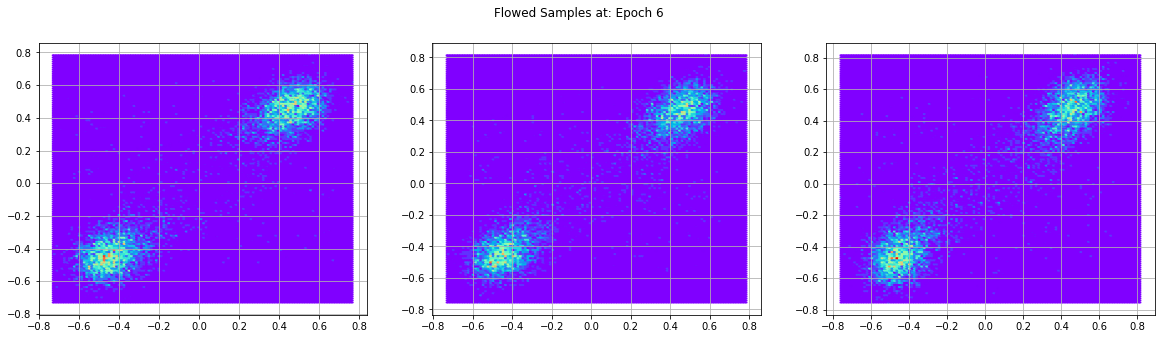

[ Epoch  6 ]:: ( Train Avg. Over Epoch ) = 77.12542903323437, ( Generalization ) = 76.30037162955264
[ ======== ]:: Report Learning Rate =  0.0018212853721522346
[ ======== ]:: Report Norm of Gradient =  89.62661575818487
[ #### ]:: In training ...  ... (epoch7=>batch0)
[ #### ]:: In training ...  ... (epoch7=>batch10)
[ #### ]:: In training ...  ... (epoch7=>batch20)
[ #### ]:: In training ...  ... (epoch7=>batch30)
[ #### ]:: In training ...  ... (epoch7=>batch40)
[ #### ]:: In training ...  ... (epoch7=>batch50)
[ #### ]:: In training ...  ... (epoch7=>batch60)
[ #### ]:: In training ...  ... (epoch7=>batch70)
[ #### ]:: In training ...  ... (epoch7=>batch80)
[ #### ]:: In training ...  ... (epoch7=>batch90)
[ #### ]:: In training ...  ... (epoch7=>batch100)
[ #### ]:: In training ...  ... (epoch7=>batch110)
[ #### ]:: In training ...  ... (epoch7=>batch120)
[ #### ]:: In training ...  ... (epoch7=>batch130)
[ #### ]:: In training ...  ... (epoch7=>batch140)
[ #### ]:: In training .

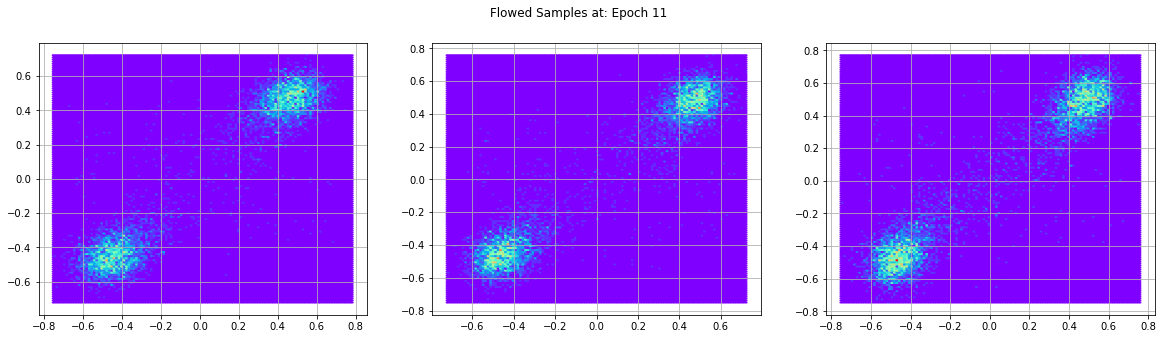

[ Epoch  11 ]:: ( Train Avg. Over Epoch ) = 77.0162512764753, ( Generalization ) = 76.1469117805524
[ ======== ]:: Report Learning Rate =  0.001684617609365419
[ ======== ]:: Report Norm of Gradient =  96.21439824012971
[ #### ]:: In training ...  ... (epoch12=>batch0)
[ #### ]:: In training ...  ... (epoch12=>batch10)
[ #### ]:: In training ...  ... (epoch12=>batch20)
[ #### ]:: In training ...  ... (epoch12=>batch30)
[ #### ]:: In training ...  ... (epoch12=>batch40)
[ #### ]:: In training ...  ... (epoch12=>batch50)
[ #### ]:: In training ...  ... (epoch12=>batch60)
[ #### ]:: In training ...  ... (epoch12=>batch70)
[ #### ]:: In training ...  ... (epoch12=>batch80)
[ #### ]:: In training ...  ... (epoch12=>batch90)
[ #### ]:: In training ...  ... (epoch12=>batch100)
[ #### ]:: In training ...  ... (epoch12=>batch110)
[ #### ]:: In training ...  ... (epoch12=>batch120)
[ #### ]:: In training ...  ... (epoch12=>batch130)
[ #### ]:: In training ...  ... (epoch12=>batch140)
[ #### ]:: 

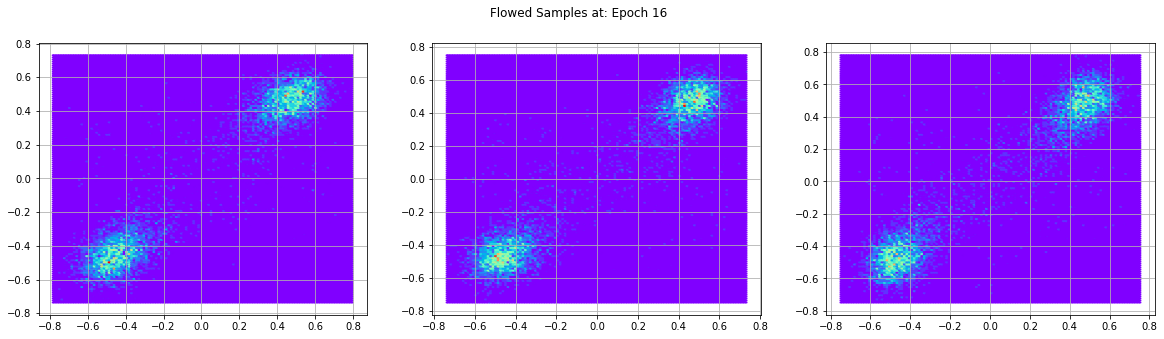

[ Epoch  16 ]:: ( Train Avg. Over Epoch ) = 76.7648028061779, ( Generalization ) = 76.09430494157762
[ ======== ]:: Report Learning Rate =  0.0015582052835742242
[ ======== ]:: Report Norm of Gradient =  145.33389125451455
[ #### ]:: In training ...  ... (epoch17=>batch0)
[ #### ]:: In training ...  ... (epoch17=>batch10)
[ #### ]:: In training ...  ... (epoch17=>batch20)
[ #### ]:: In training ...  ... (epoch17=>batch30)
[ #### ]:: In training ...  ... (epoch17=>batch40)
[ #### ]:: In training ...  ... (epoch17=>batch50)
[ #### ]:: In training ...  ... (epoch17=>batch60)
[ #### ]:: In training ...  ... (epoch17=>batch70)
[ #### ]:: In training ...  ... (epoch17=>batch80)
[ #### ]:: In training ...  ... (epoch17=>batch90)
[ #### ]:: In training ...  ... (epoch17=>batch100)
[ #### ]:: In training ...  ... (epoch17=>batch110)
[ #### ]:: In training ...  ... (epoch17=>batch120)
[ #### ]:: In training ...  ... (epoch17=>batch130)
[ #### ]:: In training ...  ... (epoch17=>batch140)
[ #### ]

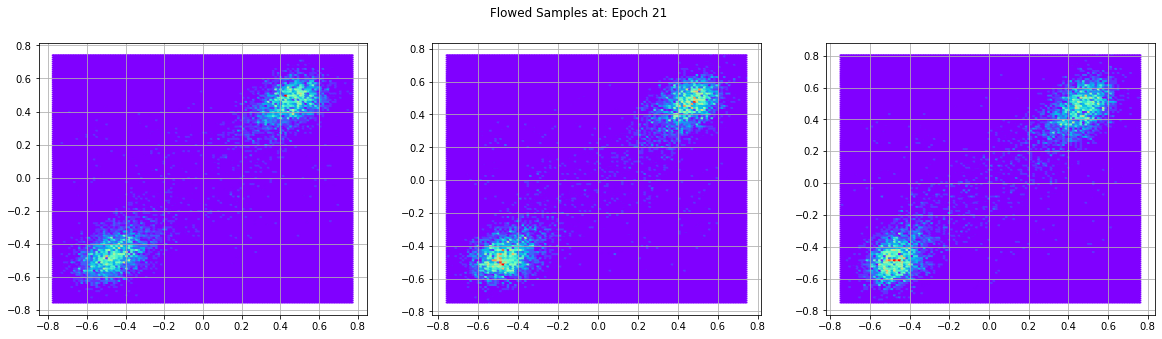

[ Epoch  21 ]:: ( Train Avg. Over Epoch ) = 76.7699193058654, ( Generalization ) = 76.11626517054327
[ ======== ]:: Report Learning Rate =  0.0014412788351851789
[ ======== ]:: Report Norm of Gradient =  128.22693243571746
[ #### ]:: In training ...  ... (epoch22=>batch0)
[ #### ]:: In training ...  ... (epoch22=>batch10)
[ #### ]:: In training ...  ... (epoch22=>batch20)
[ #### ]:: In training ...  ... (epoch22=>batch30)
[ #### ]:: In training ...  ... (epoch22=>batch40)
[ #### ]:: In training ...  ... (epoch22=>batch50)
[ #### ]:: In training ...  ... (epoch22=>batch60)
[ #### ]:: In training ...  ... (epoch22=>batch70)
[ #### ]:: In training ...  ... (epoch22=>batch80)
[ #### ]:: In training ...  ... (epoch22=>batch90)
[ #### ]:: In training ...  ... (epoch22=>batch100)
[ #### ]:: In training ...  ... (epoch22=>batch110)
[ #### ]:: In training ...  ... (epoch22=>batch120)
[ #### ]:: In training ...  ... (epoch22=>batch130)
[ #### ]:: In training ...  ... (epoch22=>batch140)
[ #### ]

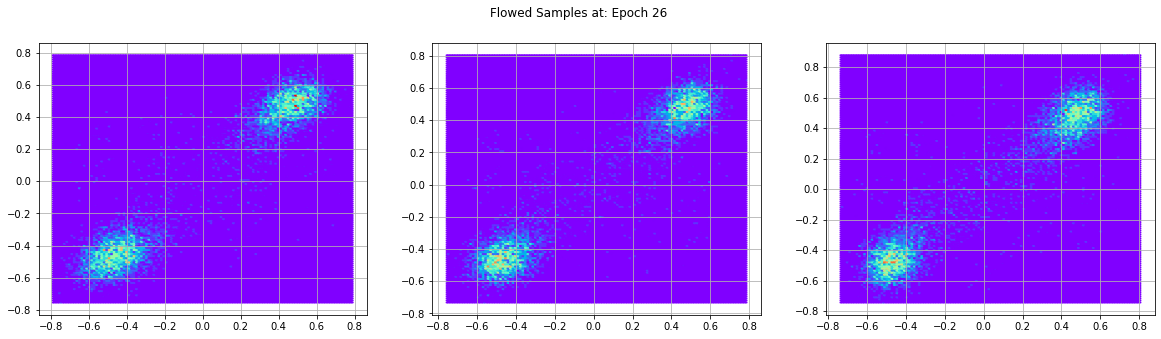

[ Epoch  26 ]:: ( Train Avg. Over Epoch ) = 76.61992856742056, ( Generalization ) = 75.94592388006932
[ ======== ]:: Report Learning Rate =  0.001333126451726472
[ ======== ]:: Report Norm of Gradient =  120.20132315272298
[ #### ]:: In training ...  ... (epoch27=>batch0)
[ #### ]:: In training ...  ... (epoch27=>batch10)
[ #### ]:: In training ...  ... (epoch27=>batch20)
[ #### ]:: In training ...  ... (epoch27=>batch30)
[ #### ]:: In training ...  ... (epoch27=>batch40)
[ #### ]:: In training ...  ... (epoch27=>batch50)
[ #### ]:: In training ...  ... (epoch27=>batch60)
[ #### ]:: In training ...  ... (epoch27=>batch70)
[ #### ]:: In training ...  ... (epoch27=>batch80)
[ #### ]:: In training ...  ... (epoch27=>batch90)
[ #### ]:: In training ...  ... (epoch27=>batch100)
[ #### ]:: In training ...  ... (epoch27=>batch110)
[ #### ]:: In training ...  ... (epoch27=>batch120)
[ #### ]:: In training ...  ... (epoch27=>batch130)
[ #### ]:: In training ...  ... (epoch27=>batch140)
[ #### ]

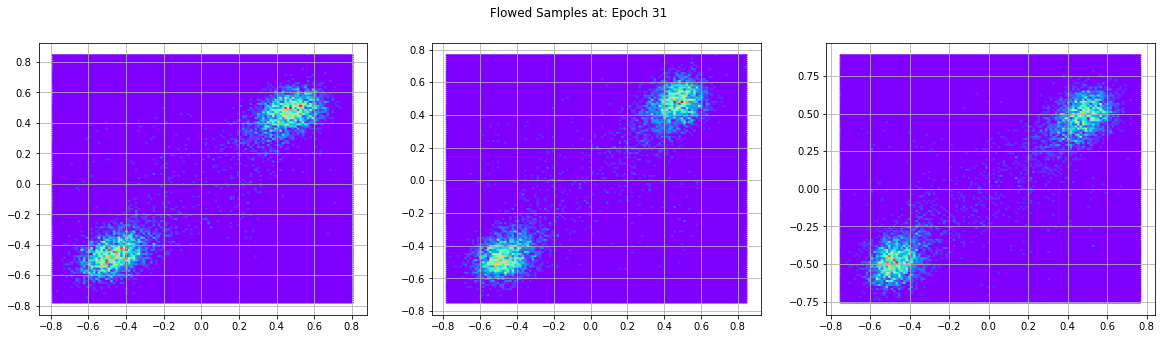

[ Epoch  31 ]:: ( Train Avg. Over Epoch ) = 76.56976806016499, ( Generalization ) = 75.88789205060478
[ ======== ]:: Report Learning Rate =  0.0012330897345512373
[ ======== ]:: Report Norm of Gradient =  130.6707077006608
[ #### ]:: In training ...  ... (epoch32=>batch0)
[ #### ]:: In training ...  ... (epoch32=>batch10)
[ #### ]:: In training ...  ... (epoch32=>batch20)
[ #### ]:: In training ...  ... (epoch32=>batch30)
[ #### ]:: In training ...  ... (epoch32=>batch40)
[ #### ]:: In training ...  ... (epoch32=>batch50)
[ #### ]:: In training ...  ... (epoch32=>batch60)
[ #### ]:: In training ...  ... (epoch32=>batch70)
[ #### ]:: In training ...  ... (epoch32=>batch80)
[ #### ]:: In training ...  ... (epoch32=>batch90)
[ #### ]:: In training ...  ... (epoch32=>batch100)
[ #### ]:: In training ...  ... (epoch32=>batch110)
[ #### ]:: In training ...  ... (epoch32=>batch120)
[ #### ]:: In training ...  ... (epoch32=>batch130)
[ #### ]:: In training ...  ... (epoch32=>batch140)
[ #### ]

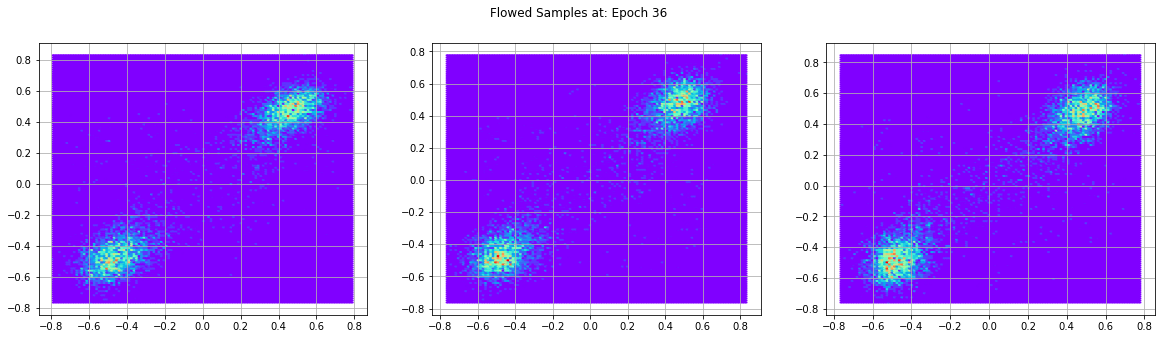

[ Epoch  36 ]:: ( Train Avg. Over Epoch ) = 76.27459824500738, ( Generalization ) = 75.88441418363495
[ ======== ]:: Report Learning Rate =  0.0011405596907078837
[ ======== ]:: Report Norm of Gradient =  123.72154957131332
[ #### ]:: In training ...  ... (epoch37=>batch0)
[ #### ]:: In training ...  ... (epoch37=>batch10)
[ #### ]:: In training ...  ... (epoch37=>batch20)
[ #### ]:: In training ...  ... (epoch37=>batch30)
[ #### ]:: In training ...  ... (epoch37=>batch40)
[ #### ]:: In training ...  ... (epoch37=>batch50)
[ #### ]:: In training ...  ... (epoch37=>batch60)
[ #### ]:: In training ...  ... (epoch37=>batch70)
[ #### ]:: In training ...  ... (epoch37=>batch80)
[ #### ]:: In training ...  ... (epoch37=>batch90)
[ #### ]:: In training ...  ... (epoch37=>batch100)
[ #### ]:: In training ...  ... (epoch37=>batch110)
[ #### ]:: In training ...  ... (epoch37=>batch120)
[ #### ]:: In training ...  ... (epoch37=>batch130)
[ #### ]:: In training ...  ... (epoch37=>batch140)
[ #### 

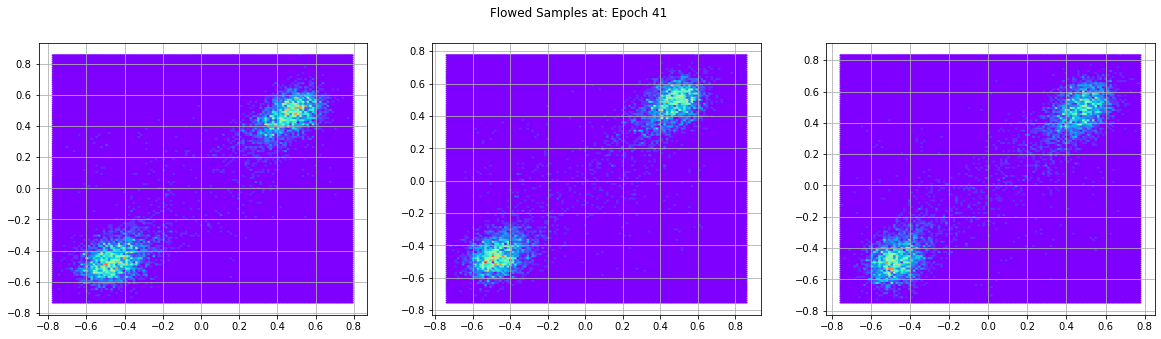

[ Epoch  41 ]:: ( Train Avg. Over Epoch ) = 76.60839382185303, ( Generalization ) = 75.78696880416055
[ ======== ]:: Report Learning Rate =  0.0010549730255771687
[ ======== ]:: Report Norm of Gradient =  152.41874515270862
[ #### ]:: In training ...  ... (epoch42=>batch0)
[ #### ]:: In training ...  ... (epoch42=>batch10)
[ #### ]:: In training ...  ... (epoch42=>batch20)
[ #### ]:: In training ...  ... (epoch42=>batch30)
[ #### ]:: In training ...  ... (epoch42=>batch40)
[ #### ]:: In training ...  ... (epoch42=>batch50)
[ #### ]:: In training ...  ... (epoch42=>batch60)
[ #### ]:: In training ...  ... (epoch42=>batch70)
[ #### ]:: In training ...  ... (epoch42=>batch80)
[ #### ]:: In training ...  ... (epoch42=>batch90)
[ #### ]:: In training ...  ... (epoch42=>batch100)
[ #### ]:: In training ...  ... (epoch42=>batch110)
[ #### ]:: In training ...  ... (epoch42=>batch120)
[ #### ]:: In training ...  ... (epoch42=>batch130)
[ #### ]:: In training ...  ... (epoch42=>batch140)
[ #### 

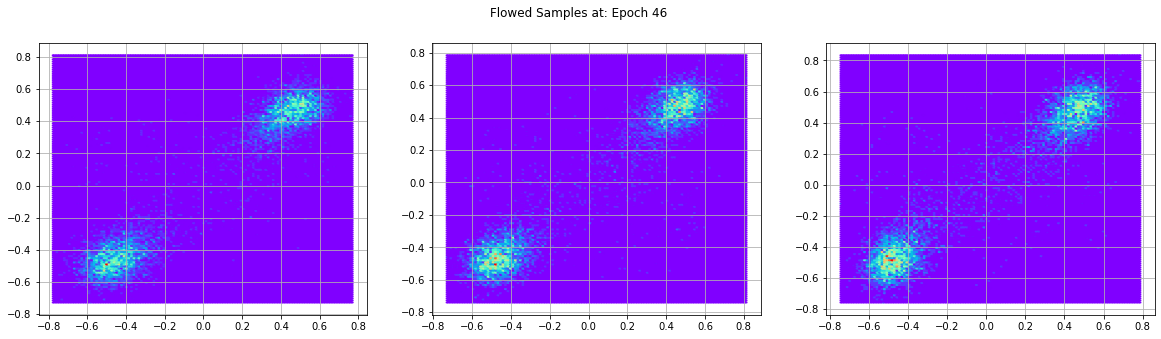

[ Epoch  46 ]:: ( Train Avg. Over Epoch ) = 76.62520000792095, ( Generalization ) = 75.70980909705307
[ ======== ]:: Report Learning Rate =  0.000975808713706764
[ ======== ]:: Report Norm of Gradient =  197.61868451663454
[ #### ]:: In training ...  ... (epoch47=>batch0)
[ #### ]:: In training ...  ... (epoch47=>batch10)
[ #### ]:: In training ...  ... (epoch47=>batch20)
[ #### ]:: In training ...  ... (epoch47=>batch30)
[ #### ]:: In training ...  ... (epoch47=>batch40)
[ #### ]:: In training ...  ... (epoch47=>batch50)
[ #### ]:: In training ...  ... (epoch47=>batch60)
[ #### ]:: In training ...  ... (epoch47=>batch70)
[ #### ]:: In training ...  ... (epoch47=>batch80)
[ #### ]:: In training ...  ... (epoch47=>batch90)
[ #### ]:: In training ...  ... (epoch47=>batch100)
[ #### ]:: In training ...  ... (epoch47=>batch110)
[ #### ]:: In training ...  ... (epoch47=>batch120)
[ #### ]:: In training ...  ... (epoch47=>batch130)
[ #### ]:: In training ...  ... (epoch47=>batch140)
[ #### ]

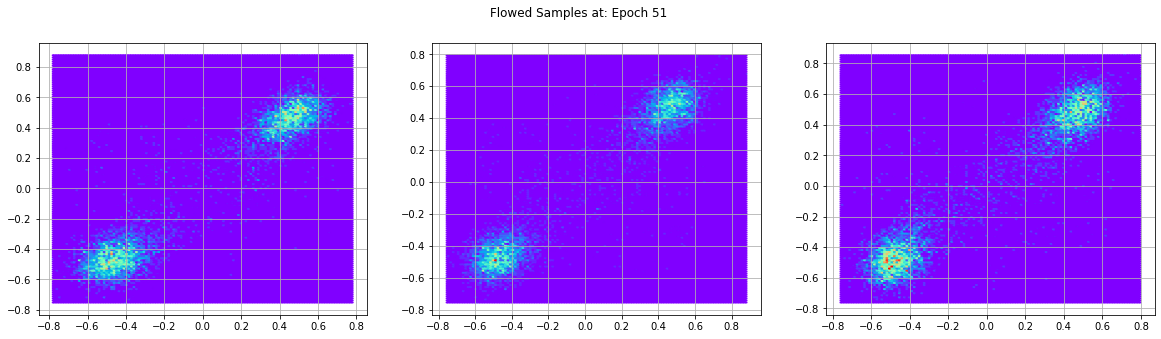

[ Epoch  51 ]:: ( Train Avg. Over Epoch ) = 76.18927084999174, ( Generalization ) = 75.77523101362587
[ ======== ]:: Report Learning Rate =  0.0009025848269675926
[ ======== ]:: Report Norm of Gradient =  126.27457781480761
[ #### ]:: In training ...  ... (epoch52=>batch0)
[ #### ]:: In training ...  ... (epoch52=>batch10)
[ #### ]:: In training ...  ... (epoch52=>batch20)
[ #### ]:: In training ...  ... (epoch52=>batch30)
[ #### ]:: In training ...  ... (epoch52=>batch40)
[ #### ]:: In training ...  ... (epoch52=>batch50)
[ #### ]:: In training ...  ... (epoch52=>batch60)
[ #### ]:: In training ...  ... (epoch52=>batch70)
[ #### ]:: In training ...  ... (epoch52=>batch80)
[ #### ]:: In training ...  ... (epoch52=>batch90)
[ #### ]:: In training ...  ... (epoch52=>batch100)
[ #### ]:: In training ...  ... (epoch52=>batch110)
[ #### ]:: In training ...  ... (epoch52=>batch120)
[ #### ]:: In training ...  ... (epoch52=>batch130)
[ #### ]:: In training ...  ... (epoch52=>batch140)
[ #### 

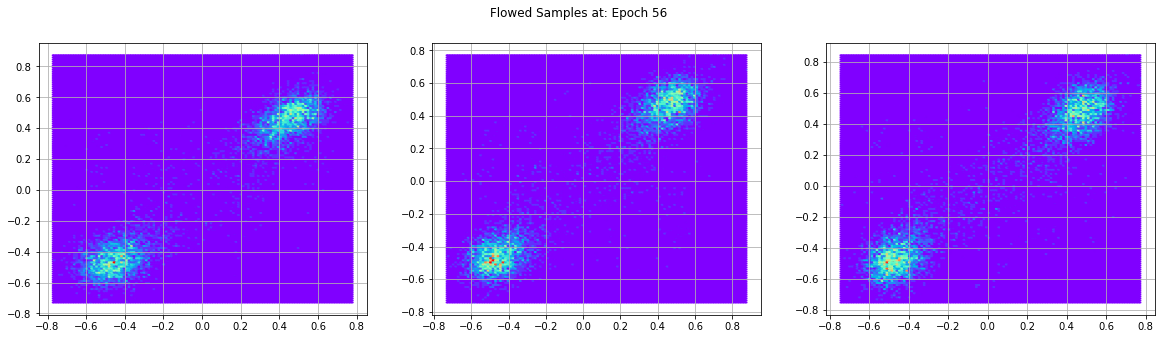

[ Epoch  56 ]:: ( Train Avg. Over Epoch ) = 76.47382985756674, ( Generalization ) = 75.63560799997529
[ ======== ]:: Report Learning Rate =  0.0008348556007227153
[ ======== ]:: Report Norm of Gradient =  190.96604671390338
[ #### ]:: In training ...  ... (epoch57=>batch0)
[ #### ]:: In training ...  ... (epoch57=>batch10)
[ #### ]:: In training ...  ... (epoch57=>batch20)
[ #### ]:: In training ...  ... (epoch57=>batch30)
[ #### ]:: In training ...  ... (epoch57=>batch40)
[ #### ]:: In training ...  ... (epoch57=>batch50)
[ #### ]:: In training ...  ... (epoch57=>batch60)
[ #### ]:: In training ...  ... (epoch57=>batch70)
[ #### ]:: In training ...  ... (epoch57=>batch80)
[ #### ]:: In training ...  ... (epoch57=>batch90)
[ #### ]:: In training ...  ... (epoch57=>batch100)
[ #### ]:: In training ...  ... (epoch57=>batch110)
[ #### ]:: In training ...  ... (epoch57=>batch120)
[ #### ]:: In training ...  ... (epoch57=>batch130)
[ #### ]:: In training ...  ... (epoch57=>batch140)
[ #### 

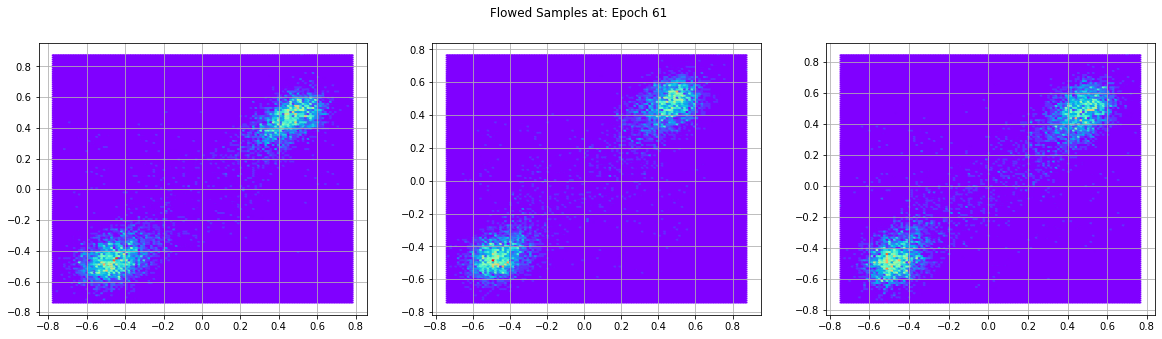

[ Epoch  61 ]:: ( Train Avg. Over Epoch ) = 76.16439110919717, ( Generalization ) = 75.53727604769274
[ ======== ]:: Report Learning Rate =  0.0007722087201484824
[ ======== ]:: Report Norm of Gradient =  177.86380467774046
[ #### ]:: In training ...  ... (epoch62=>batch0)
[ #### ]:: In training ...  ... (epoch62=>batch10)
[ #### ]:: In training ...  ... (epoch62=>batch20)
[ #### ]:: In training ...  ... (epoch62=>batch30)
[ #### ]:: In training ...  ... (epoch62=>batch40)
[ #### ]:: In training ...  ... (epoch62=>batch50)
[ #### ]:: In training ...  ... (epoch62=>batch60)
[ #### ]:: In training ...  ... (epoch62=>batch70)
[ #### ]:: In training ...  ... (epoch62=>batch80)
[ #### ]:: In training ...  ... (epoch62=>batch90)
[ #### ]:: In training ...  ... (epoch62=>batch100)
[ #### ]:: In training ...  ... (epoch62=>batch110)
[ #### ]:: In training ...  ... (epoch62=>batch120)
[ #### ]:: In training ...  ... (epoch62=>batch130)
[ #### ]:: In training ...  ... (epoch62=>batch140)
[ #### 

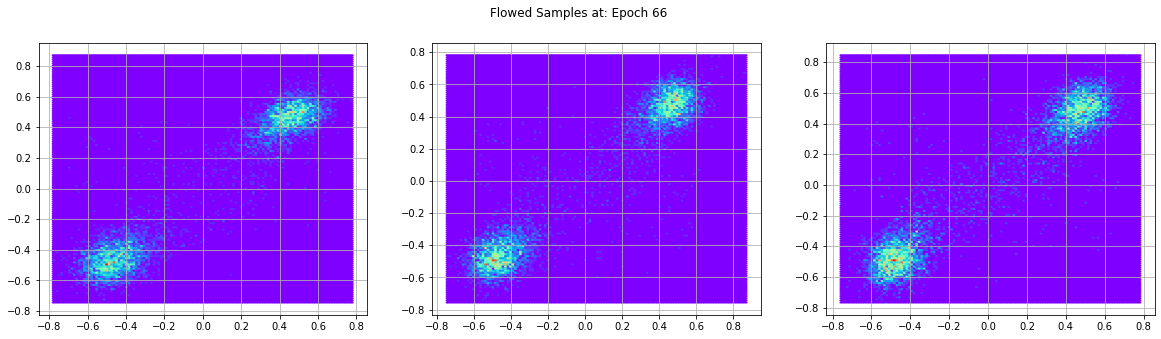

[ Epoch  66 ]:: ( Train Avg. Over Epoch ) = 76.0398083223446, ( Generalization ) = 75.5469735199284
[ ======== ]:: Report Learning Rate =  0.0007142628101879537
[ ======== ]:: Report Norm of Gradient =  129.7846455176524
[ #### ]:: In training ...  ... (epoch67=>batch0)
[ #### ]:: In training ...  ... (epoch67=>batch10)
[ #### ]:: In training ...  ... (epoch67=>batch20)
[ #### ]:: In training ...  ... (epoch67=>batch30)
[ #### ]:: In training ...  ... (epoch67=>batch40)
[ #### ]:: In training ...  ... (epoch67=>batch50)
[ #### ]:: In training ...  ... (epoch67=>batch60)
[ #### ]:: In training ...  ... (epoch67=>batch70)
[ #### ]:: In training ...  ... (epoch67=>batch80)
[ #### ]:: In training ...  ... (epoch67=>batch90)
[ #### ]:: In training ...  ... (epoch67=>batch100)
[ #### ]:: In training ...  ... (epoch67=>batch110)
[ #### ]:: In training ...  ... (epoch67=>batch120)
[ #### ]:: In training ...  ... (epoch67=>batch130)
[ #### ]:: In training ...  ... (epoch67=>batch140)
[ #### ]::

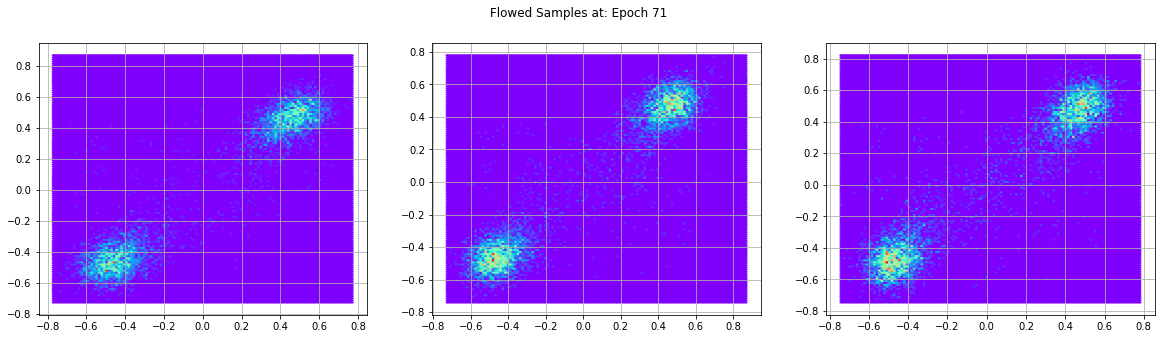

[ Epoch  71 ]:: ( Train Avg. Over Epoch ) = 76.04249548698769, ( Generalization ) = 75.49952438195031
[ ======== ]:: Report Learning Rate =  0.0006606651138561292
[ ======== ]:: Report Norm of Gradient =  138.9791205793083
[ #### ]:: In training ...  ... (epoch72=>batch0)
[ #### ]:: In training ...  ... (epoch72=>batch10)
[ #### ]:: In training ...  ... (epoch72=>batch20)
[ #### ]:: In training ...  ... (epoch72=>batch30)
[ #### ]:: In training ...  ... (epoch72=>batch40)
[ #### ]:: In training ...  ... (epoch72=>batch50)
[ #### ]:: In training ...  ... (epoch72=>batch60)
[ #### ]:: In training ...  ... (epoch72=>batch70)
[ #### ]:: In training ...  ... (epoch72=>batch80)
[ #### ]:: In training ...  ... (epoch72=>batch90)
[ #### ]:: In training ...  ... (epoch72=>batch100)
[ #### ]:: In training ...  ... (epoch72=>batch110)
[ #### ]:: In training ...  ... (epoch72=>batch120)
[ #### ]:: In training ...  ... (epoch72=>batch130)
[ #### ]:: In training ...  ... (epoch72=>batch140)
[ #### ]

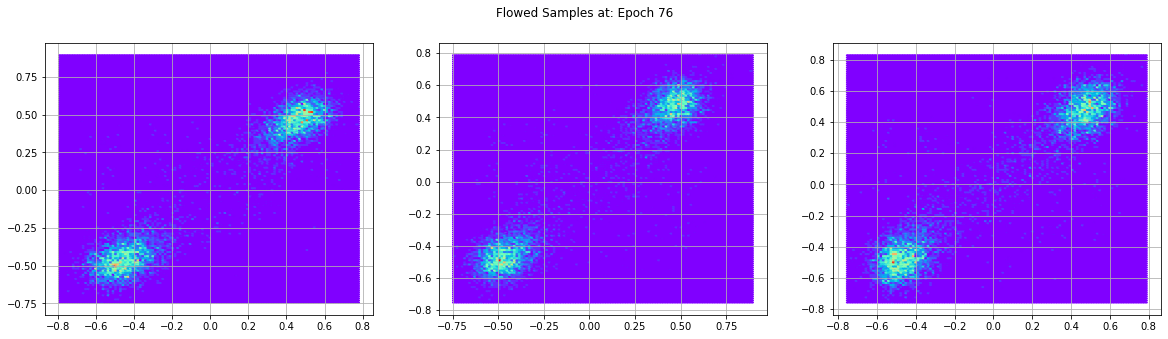

[ Epoch  76 ]:: ( Train Avg. Over Epoch ) = 76.15199555726164, ( Generalization ) = 75.56646041293969
[ ======== ]:: Report Learning Rate =  0.0006110893447632745
[ ======== ]:: Report Norm of Gradient =  188.42906007123582
[ #### ]:: In training ...  ... (epoch77=>batch0)
[ #### ]:: In training ...  ... (epoch77=>batch10)
[ #### ]:: In training ...  ... (epoch77=>batch20)
[ #### ]:: In training ...  ... (epoch77=>batch30)
[ #### ]:: In training ...  ... (epoch77=>batch40)
[ #### ]:: In training ...  ... (epoch77=>batch50)
[ #### ]:: In training ...  ... (epoch77=>batch60)
[ #### ]:: In training ...  ... (epoch77=>batch70)
[ #### ]:: In training ...  ... (epoch77=>batch80)
[ #### ]:: In training ...  ... (epoch77=>batch90)
[ #### ]:: In training ...  ... (epoch77=>batch100)
[ #### ]:: In training ...  ... (epoch77=>batch110)
[ #### ]:: In training ...  ... (epoch77=>batch120)
[ #### ]:: In training ...  ... (epoch77=>batch130)
[ #### ]:: In training ...  ... (epoch77=>batch140)
[ #### 

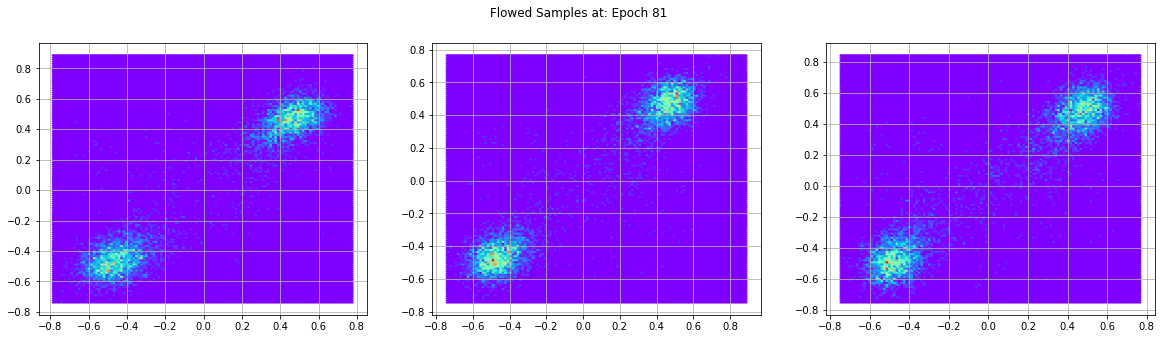

[ Epoch  81 ]:: ( Train Avg. Over Epoch ) = 76.00197350976829, ( Generalization ) = 75.48273679528553
[ ======== ]:: Report Learning Rate =  0.00056523370078313
[ ======== ]:: Report Norm of Gradient =  191.28419324129482
[ #### ]:: In training ...  ... (epoch82=>batch0)
[ #### ]:: In training ...  ... (epoch82=>batch10)
[ #### ]:: In training ...  ... (epoch82=>batch20)
[ #### ]:: In training ...  ... (epoch82=>batch30)
[ #### ]:: In training ...  ... (epoch82=>batch40)
[ #### ]:: In training ...  ... (epoch82=>batch50)
[ #### ]:: In training ...  ... (epoch82=>batch60)
[ #### ]:: In training ...  ... (epoch82=>batch70)
[ #### ]:: In training ...  ... (epoch82=>batch80)
[ #### ]:: In training ...  ... (epoch82=>batch90)
[ #### ]:: In training ...  ... (epoch82=>batch100)
[ #### ]:: In training ...  ... (epoch82=>batch110)
[ #### ]:: In training ...  ... (epoch82=>batch120)
[ #### ]:: In training ...  ... (epoch82=>batch130)
[ #### ]:: In training ...  ... (epoch82=>batch140)
[ #### ]:

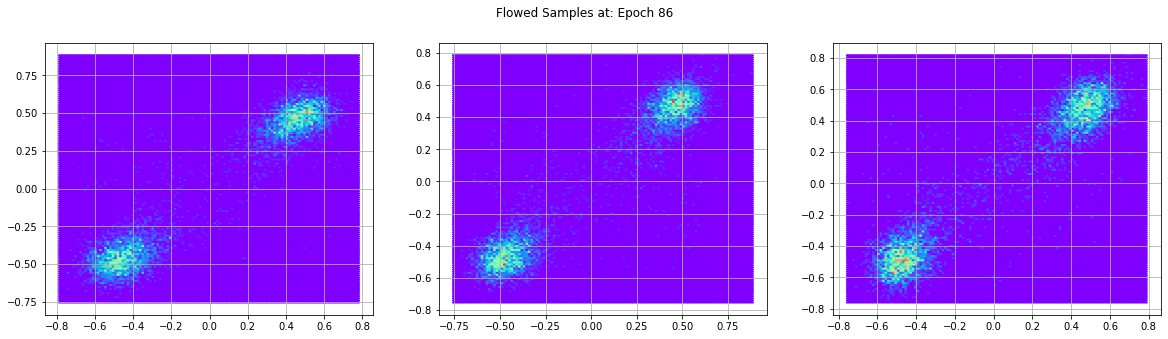

[ Epoch  86 ]:: ( Train Avg. Over Epoch ) = 76.11959266667141, ( Generalization ) = 75.43649077904605
[ ======== ]:: Report Learning Rate =  0.0005228190267738309
[ ======== ]:: Report Norm of Gradient =  257.3787377022693
[ #### ]:: In training ...  ... (epoch87=>batch0)
[ #### ]:: In training ...  ... (epoch87=>batch10)
[ #### ]:: In training ...  ... (epoch87=>batch20)
[ #### ]:: In training ...  ... (epoch87=>batch30)
[ #### ]:: In training ...  ... (epoch87=>batch40)
[ #### ]:: In training ...  ... (epoch87=>batch50)
[ #### ]:: In training ...  ... (epoch87=>batch60)
[ #### ]:: In training ...  ... (epoch87=>batch70)
[ #### ]:: In training ...  ... (epoch87=>batch80)
[ #### ]:: In training ...  ... (epoch87=>batch90)
[ #### ]:: In training ...  ... (epoch87=>batch100)
[ #### ]:: In training ...  ... (epoch87=>batch110)
[ #### ]:: In training ...  ... (epoch87=>batch120)
[ #### ]:: In training ...  ... (epoch87=>batch130)
[ #### ]:: In training ...  ... (epoch87=>batch140)
[ #### ]

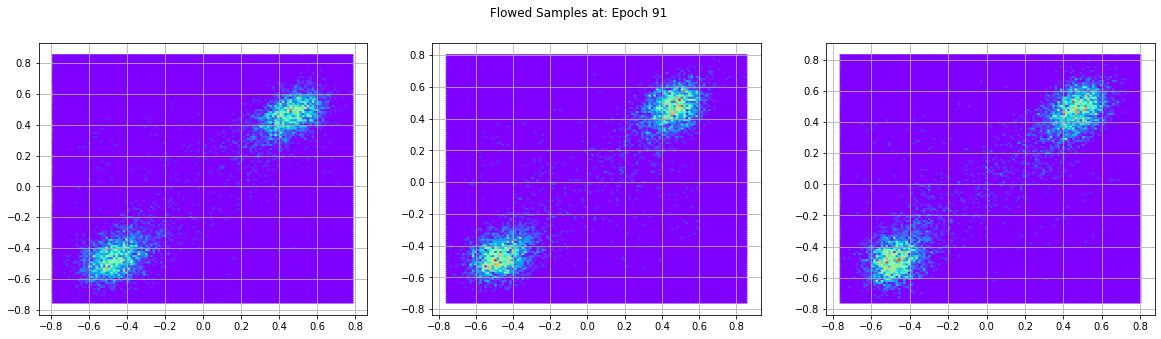

[ Epoch  91 ]:: ( Train Avg. Over Epoch ) = 76.04116145990477, ( Generalization ) = 75.46409190880313
[ ======== ]:: Report Learning Rate =  0.0004835871151667432
[ ======== ]:: Report Norm of Gradient =  171.5253406786461
[ #### ]:: In training ...  ... (epoch92=>batch0)
[ #### ]:: In training ...  ... (epoch92=>batch10)
[ #### ]:: In training ...  ... (epoch92=>batch20)
[ #### ]:: In training ...  ... (epoch92=>batch30)
[ #### ]:: In training ...  ... (epoch92=>batch40)
[ #### ]:: In training ...  ... (epoch92=>batch50)
[ #### ]:: In training ...  ... (epoch92=>batch60)
[ #### ]:: In training ...  ... (epoch92=>batch70)
[ #### ]:: In training ...  ... (epoch92=>batch80)
[ #### ]:: In training ...  ... (epoch92=>batch90)
[ #### ]:: In training ...  ... (epoch92=>batch100)
[ #### ]:: In training ...  ... (epoch92=>batch110)
[ #### ]:: In training ...  ... (epoch92=>batch120)
[ #### ]:: In training ...  ... (epoch92=>batch130)
[ #### ]:: In training ...  ... (epoch92=>batch140)
[ #### ]

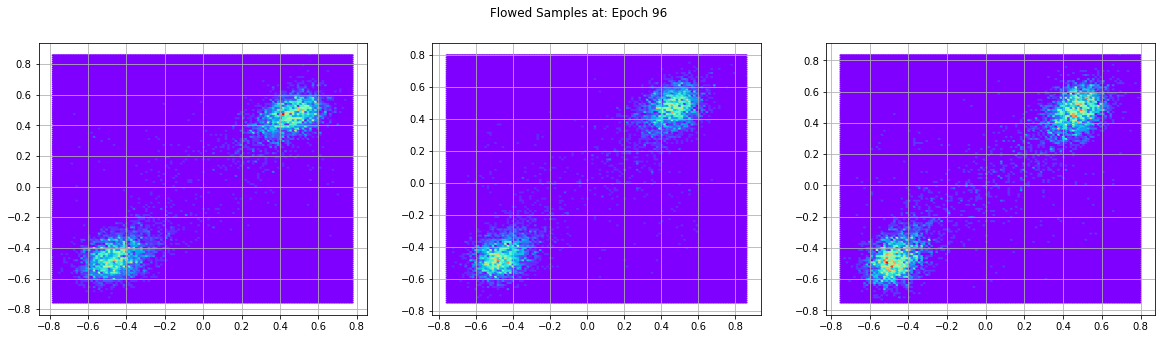

[ Epoch  96 ]:: ( Train Avg. Over Epoch ) = 76.02983620713192, ( Generalization ) = 75.47484674034925
[ ======== ]:: Report Learning Rate =  0.00044729913407772355
[ ======== ]:: Report Norm of Gradient =  288.1083815828427
[ #### ]:: In training ...  ... (epoch97=>batch0)
[ #### ]:: In training ...  ... (epoch97=>batch10)
[ #### ]:: In training ...  ... (epoch97=>batch20)
[ #### ]:: In training ...  ... (epoch97=>batch30)
[ #### ]:: In training ...  ... (epoch97=>batch40)
[ #### ]:: In training ...  ... (epoch97=>batch50)
[ #### ]:: In training ...  ... (epoch97=>batch60)
[ #### ]:: In training ...  ... (epoch97=>batch70)
[ #### ]:: In training ...  ... (epoch97=>batch80)
[ #### ]:: In training ...  ... (epoch97=>batch90)
[ #### ]:: In training ...  ... (epoch97=>batch100)
[ #### ]:: In training ...  ... (epoch97=>batch110)
[ #### ]:: In training ...  ... (epoch97=>batch120)
[ #### ]:: In training ...  ... (epoch97=>batch130)
[ #### ]:: In training ...  ... (epoch97=>batch140)
[ #### 

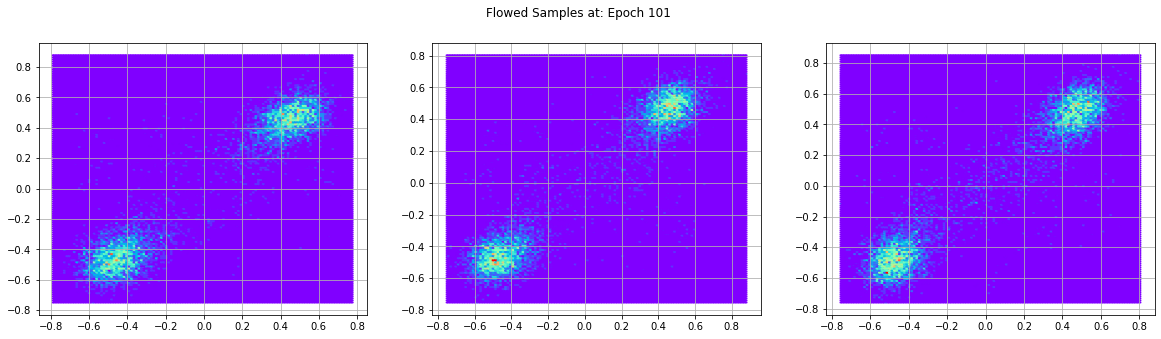

[ Epoch  101 ]:: ( Train Avg. Over Epoch ) = 76.16484801486304, ( Generalization ) = 75.43707950050859
[ ======== ]:: Report Learning Rate =  0.00041373417337162524
[ ======== ]:: Report Norm of Gradient =  129.78175076415363
[ #### ]:: In training ...  ... (epoch102=>batch0)
[ #### ]:: In training ...  ... (epoch102=>batch10)
[ #### ]:: In training ...  ... (epoch102=>batch20)
[ #### ]:: In training ...  ... (epoch102=>batch30)
[ #### ]:: In training ...  ... (epoch102=>batch40)
[ #### ]:: In training ...  ... (epoch102=>batch50)
[ #### ]:: In training ...  ... (epoch102=>batch60)
[ #### ]:: In training ...  ... (epoch102=>batch70)
[ #### ]:: In training ...  ... (epoch102=>batch80)
[ #### ]:: In training ...  ... (epoch102=>batch90)
[ #### ]:: In training ...  ... (epoch102=>batch100)
[ #### ]:: In training ...  ... (epoch102=>batch110)
[ #### ]:: In training ...  ... (epoch102=>batch120)
[ #### ]:: In training ...  ... (epoch102=>batch130)
[ #### ]:: In training ...  ... (epoch102=>

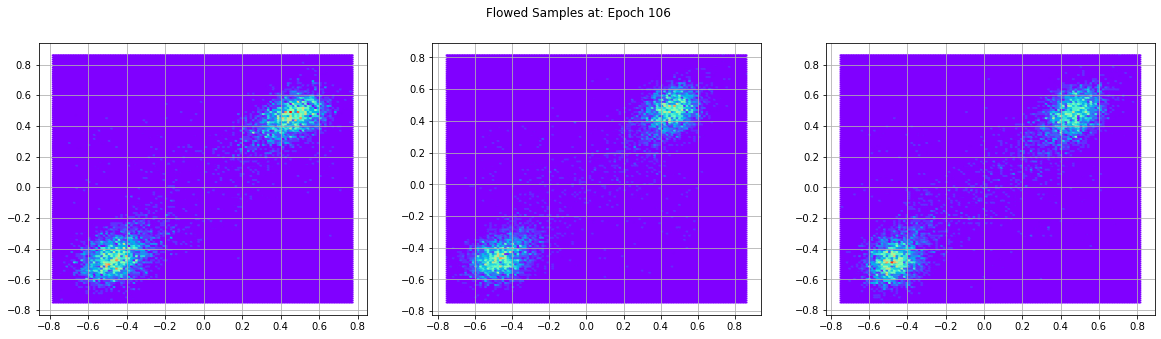

[ Epoch  106 ]:: ( Train Avg. Over Epoch ) = 76.14971484594864, ( Generalization ) = 75.4738826554073
[ ======== ]:: Report Learning Rate =  0.00038268789982892783
[ ======== ]:: Report Norm of Gradient =  214.55080969605513
[ #### ]:: In training ...  ... (epoch107=>batch0)
[ #### ]:: In training ...  ... (epoch107=>batch10)
[ #### ]:: In training ...  ... (epoch107=>batch20)
[ #### ]:: In training ...  ... (epoch107=>batch30)
[ #### ]:: In training ...  ... (epoch107=>batch40)
[ #### ]:: In training ...  ... (epoch107=>batch50)
[ #### ]:: In training ...  ... (epoch107=>batch60)
[ #### ]:: In training ...  ... (epoch107=>batch70)
[ #### ]:: In training ...  ... (epoch107=>batch80)
[ #### ]:: In training ...  ... (epoch107=>batch90)
[ #### ]:: In training ...  ... (epoch107=>batch100)
[ #### ]:: In training ...  ... (epoch107=>batch110)
[ #### ]:: In training ...  ... (epoch107=>batch120)
[ #### ]:: In training ...  ... (epoch107=>batch130)
[ #### ]:: In training ...  ... (epoch107=>b

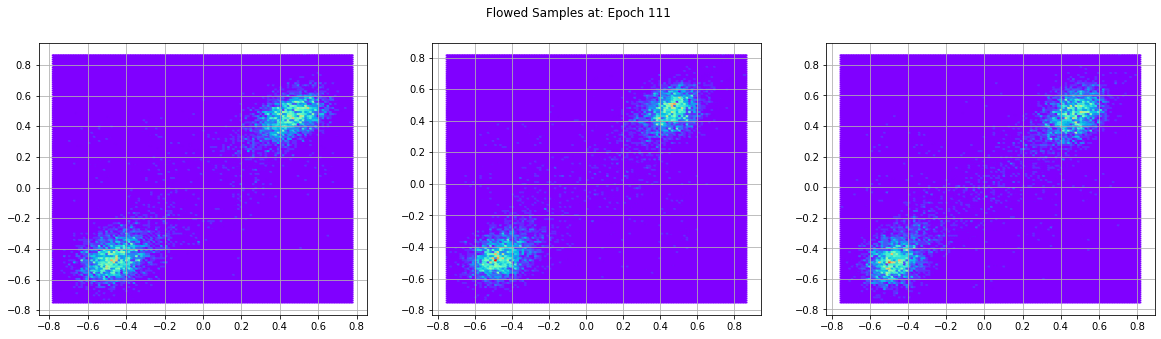

[ Epoch  111 ]:: ( Train Avg. Over Epoch ) = 76.01117835190126, ( Generalization ) = 75.45611439635482
[ ======== ]:: Report Learning Rate =  0.00035397131322756494
[ ======== ]:: Report Norm of Gradient =  237.6500798421424
[ #### ]:: In training ...  ... (epoch112=>batch0)
[ #### ]:: In training ...  ... (epoch112=>batch10)
[ #### ]:: In training ...  ... (epoch112=>batch20)
[ #### ]:: In training ...  ... (epoch112=>batch30)
[ #### ]:: In training ...  ... (epoch112=>batch40)
[ #### ]:: In training ...  ... (epoch112=>batch50)
[ #### ]:: In training ...  ... (epoch112=>batch60)
[ #### ]:: In training ...  ... (epoch112=>batch70)
[ #### ]:: In training ...  ... (epoch112=>batch80)
[ #### ]:: In training ...  ... (epoch112=>batch90)
[ #### ]:: In training ...  ... (epoch112=>batch100)
[ #### ]:: In training ...  ... (epoch112=>batch110)
[ #### ]:: In training ...  ... (epoch112=>batch120)
[ #### ]:: In training ...  ... (epoch112=>batch130)
[ #### ]:: In training ...  ... (epoch112=>b

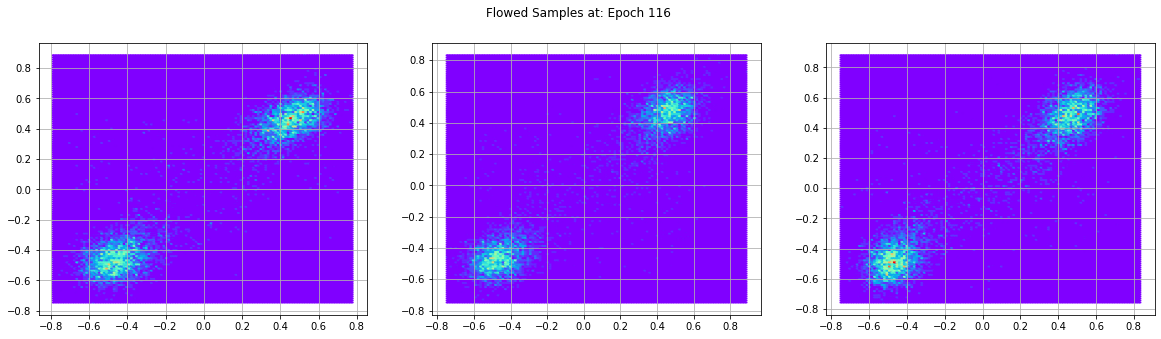

[ Epoch  116 ]:: ( Train Avg. Over Epoch ) = 76.0402155646442, ( Generalization ) = 75.48185854574325
[ ======== ]:: Report Learning Rate =  0.00032740959576735393
[ ======== ]:: Report Norm of Gradient =  215.04161818874582
[ #### ]:: In training ...  ... (epoch117=>batch0)
[ #### ]:: In training ...  ... (epoch117=>batch10)
[ #### ]:: In training ...  ... (epoch117=>batch20)
[ #### ]:: In training ...  ... (epoch117=>batch30)
[ #### ]:: In training ...  ... (epoch117=>batch40)
[ #### ]:: In training ...  ... (epoch117=>batch50)
[ #### ]:: In training ...  ... (epoch117=>batch60)
[ #### ]:: In training ...  ... (epoch117=>batch70)
[ #### ]:: In training ...  ... (epoch117=>batch80)
[ #### ]:: In training ...  ... (epoch117=>batch90)
[ #### ]:: In training ...  ... (epoch117=>batch100)
[ #### ]:: In training ...  ... (epoch117=>batch110)
[ #### ]:: In training ...  ... (epoch117=>batch120)
[ #### ]:: In training ...  ... (epoch117=>batch130)
[ #### ]:: In training ...  ... (epoch117=>b

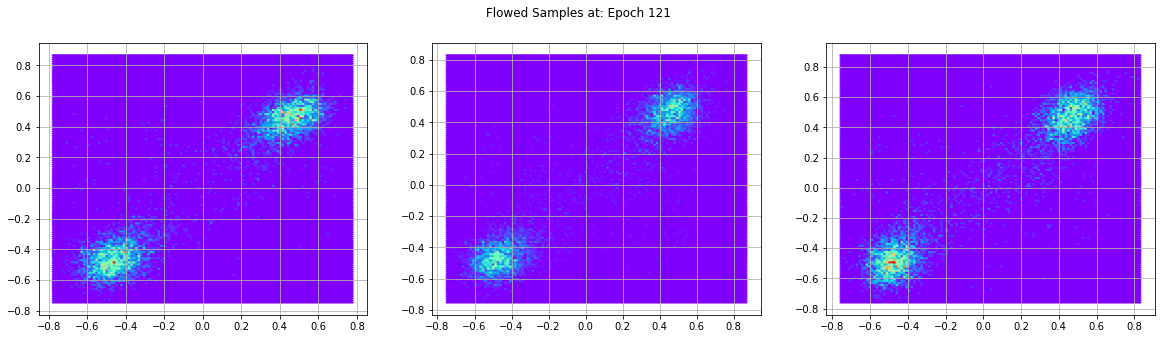

[ Epoch  121 ]:: ( Train Avg. Over Epoch ) = 75.90265296139863, ( Generalization ) = 75.4661571278023
[ ======== ]:: Report Learning Rate =  0.0003028410478326702
[ ======== ]:: Report Norm of Gradient =  162.0488216186851
[ #### ]:: In training ...  ... (epoch122=>batch0)
[ #### ]:: In training ...  ... (epoch122=>batch10)
[ #### ]:: In training ...  ... (epoch122=>batch20)
[ #### ]:: In training ...  ... (epoch122=>batch30)
[ #### ]:: In training ...  ... (epoch122=>batch40)
[ #### ]:: In training ...  ... (epoch122=>batch50)
[ #### ]:: In training ...  ... (epoch122=>batch60)
[ #### ]:: In training ...  ... (epoch122=>batch70)
[ #### ]:: In training ...  ... (epoch122=>batch80)
[ #### ]:: In training ...  ... (epoch122=>batch90)
[ #### ]:: In training ...  ... (epoch122=>batch100)
[ #### ]:: In training ...  ... (epoch122=>batch110)
[ #### ]:: In training ...  ... (epoch122=>batch120)
[ #### ]:: In training ...  ... (epoch122=>batch130)
[ #### ]:: In training ...  ... (epoch122=>bat

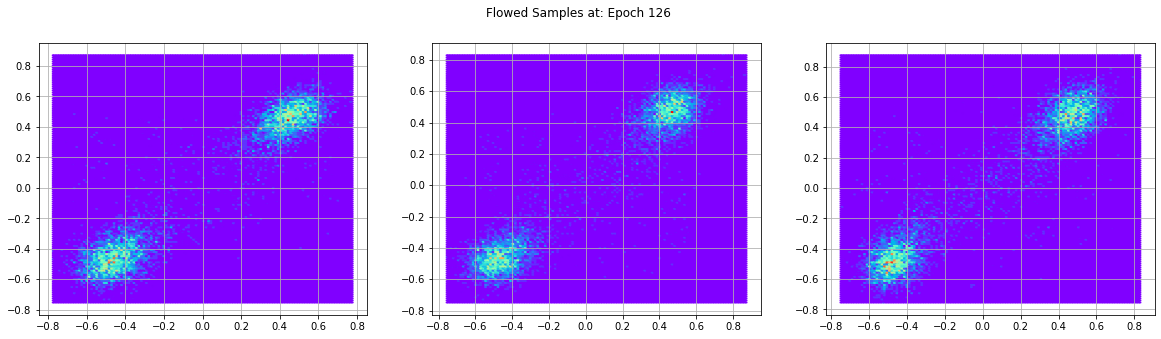

[ Epoch  126 ]:: ( Train Avg. Over Epoch ) = 76.09095269125352, ( Generalization ) = 75.41198834954224
[ ======== ]:: Report Learning Rate =  0.0002801161036146223
[ ======== ]:: Report Norm of Gradient =  244.29489742061097
[ #### ]:: In training ...  ... (epoch127=>batch0)
[ #### ]:: In training ...  ... (epoch127=>batch10)
[ #### ]:: In training ...  ... (epoch127=>batch20)
[ #### ]:: In training ...  ... (epoch127=>batch30)
[ #### ]:: In training ...  ... (epoch127=>batch40)
[ #### ]:: In training ...  ... (epoch127=>batch50)
[ #### ]:: In training ...  ... (epoch127=>batch60)
[ #### ]:: In training ...  ... (epoch127=>batch70)
[ #### ]:: In training ...  ... (epoch127=>batch80)
[ #### ]:: In training ...  ... (epoch127=>batch90)
[ #### ]:: In training ...  ... (epoch127=>batch100)
[ #### ]:: In training ...  ... (epoch127=>batch110)
[ #### ]:: In training ...  ... (epoch127=>batch120)
[ #### ]:: In training ...  ... (epoch127=>batch130)
[ #### ]:: In training ...  ... (epoch127=>b

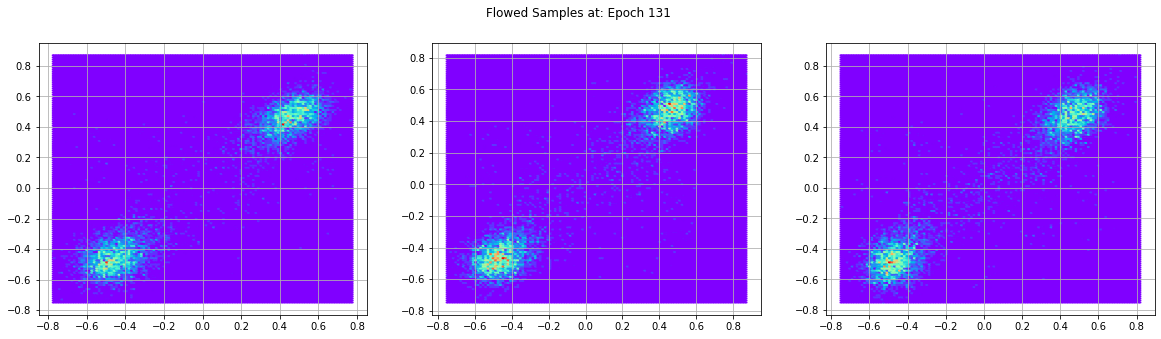

[ Epoch  131 ]:: ( Train Avg. Over Epoch ) = 75.93262952047473, ( Generalization ) = 75.36242413154214
[ ======== ]:: Report Learning Rate =  0.00025909642060013057
[ ======== ]:: Report Norm of Gradient =  254.97490113442325
[ #### ]:: In training ...  ... (epoch132=>batch0)
[ #### ]:: In training ...  ... (epoch132=>batch10)
[ #### ]:: In training ...  ... (epoch132=>batch20)
[ #### ]:: In training ...  ... (epoch132=>batch30)
[ #### ]:: In training ...  ... (epoch132=>batch40)
[ #### ]:: In training ...  ... (epoch132=>batch50)
[ #### ]:: In training ...  ... (epoch132=>batch60)
[ #### ]:: In training ...  ... (epoch132=>batch70)
[ #### ]:: In training ...  ... (epoch132=>batch80)
[ #### ]:: In training ...  ... (epoch132=>batch90)
[ #### ]:: In training ...  ... (epoch132=>batch100)
[ #### ]:: In training ...  ... (epoch132=>batch110)
[ #### ]:: In training ...  ... (epoch132=>batch120)
[ #### ]:: In training ...  ... (epoch132=>batch130)
[ #### ]:: In training ...  ... (epoch132=>

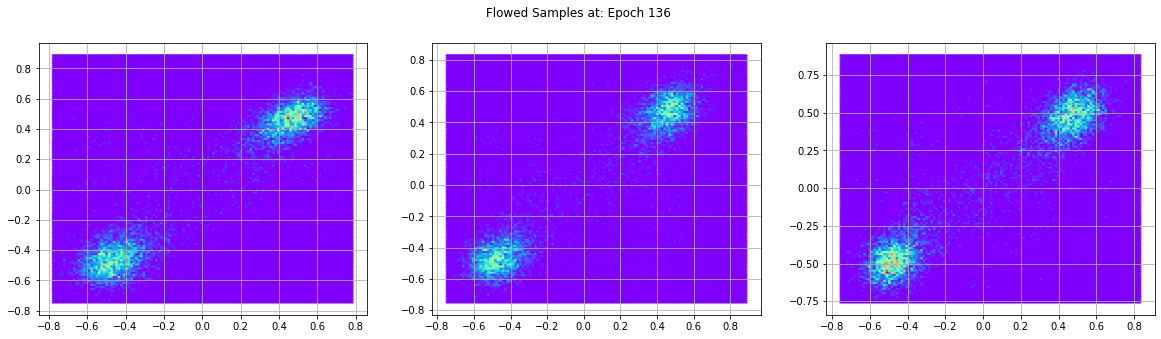

[ Epoch  136 ]:: ( Train Avg. Over Epoch ) = 75.84886274642969, ( Generalization ) = 75.36372942136776
[ ======== ]:: Report Learning Rate =  0.0002396540373850029
[ ======== ]:: Report Norm of Gradient =  680.6753427088843
[ #### ]:: In training ...  ... (epoch137=>batch0)
[ #### ]:: In training ...  ... (epoch137=>batch10)
[ #### ]:: In training ...  ... (epoch137=>batch20)
[ #### ]:: In training ...  ... (epoch137=>batch30)
[ #### ]:: In training ...  ... (epoch137=>batch40)
[ #### ]:: In training ...  ... (epoch137=>batch50)
[ #### ]:: In training ...  ... (epoch137=>batch60)
[ #### ]:: In training ...  ... (epoch137=>batch70)
[ #### ]:: In training ...  ... (epoch137=>batch80)
[ #### ]:: In training ...  ... (epoch137=>batch90)
[ #### ]:: In training ...  ... (epoch137=>batch100)
[ #### ]:: In training ...  ... (epoch137=>batch110)
[ #### ]:: In training ...  ... (epoch137=>batch120)
[ #### ]:: In training ...  ... (epoch137=>batch130)
[ #### ]:: In training ...  ... (epoch137=>ba

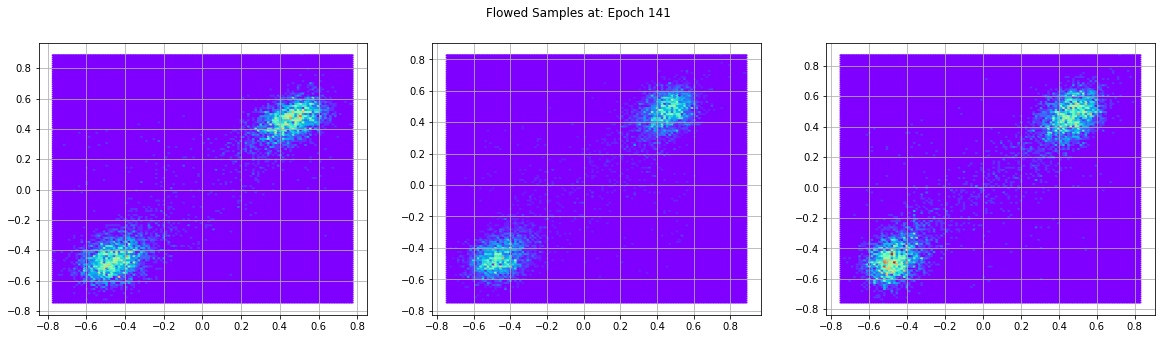

[ Epoch  141 ]:: ( Train Avg. Over Epoch ) = 76.08280772062234, ( Generalization ) = 75.3725952822072
[ ======== ]:: Report Learning Rate =  0.00022167059468402109
[ ======== ]:: Report Norm of Gradient =  192.41502261690482
[ #### ]:: In training ...  ... (epoch142=>batch0)
[ #### ]:: In training ...  ... (epoch142=>batch10)
[ #### ]:: In training ...  ... (epoch142=>batch20)
[ #### ]:: In training ...  ... (epoch142=>batch30)
[ #### ]:: In training ...  ... (epoch142=>batch40)
[ #### ]:: In training ...  ... (epoch142=>batch50)
[ #### ]:: In training ...  ... (epoch142=>batch60)
[ #### ]:: In training ...  ... (epoch142=>batch70)
[ #### ]:: In training ...  ... (epoch142=>batch80)
[ #### ]:: In training ...  ... (epoch142=>batch90)
[ #### ]:: In training ...  ... (epoch142=>batch100)
[ #### ]:: In training ...  ... (epoch142=>batch110)
[ #### ]:: In training ...  ... (epoch142=>batch120)
[ #### ]:: In training ...  ... (epoch142=>batch130)
[ #### ]:: In training ...  ... (epoch142=>b

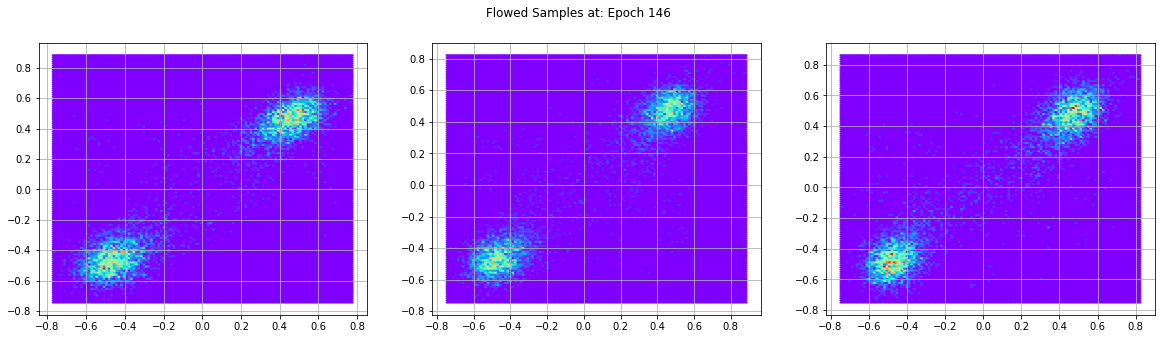

[ Epoch  146 ]:: ( Train Avg. Over Epoch ) = 75.87682283862915, ( Generalization ) = 75.34849347584833
[ ======== ]:: Report Learning Rate =  0.00020503661479580164
[ ======== ]:: Report Norm of Gradient =  169.8487811937876
[ #### ]:: In training ...  ... (epoch147=>batch0)
[ #### ]:: In training ...  ... (epoch147=>batch10)
[ #### ]:: In training ...  ... (epoch147=>batch20)
[ #### ]:: In training ...  ... (epoch147=>batch30)
[ #### ]:: In training ...  ... (epoch147=>batch40)
[ #### ]:: In training ...  ... (epoch147=>batch50)
[ #### ]:: In training ...  ... (epoch147=>batch60)
[ #### ]:: In training ...  ... (epoch147=>batch70)
[ #### ]:: In training ...  ... (epoch147=>batch80)
[ #### ]:: In training ...  ... (epoch147=>batch90)
[ #### ]:: In training ...  ... (epoch147=>batch100)
[ #### ]:: In training ...  ... (epoch147=>batch110)
[ #### ]:: In training ...  ... (epoch147=>batch120)
[ #### ]:: In training ...  ... (epoch147=>batch130)
[ #### ]:: In training ...  ... (epoch147=>b

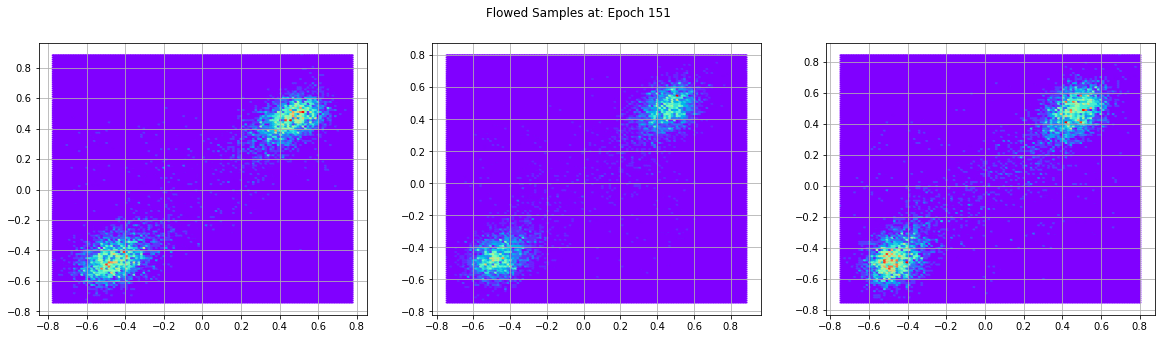

[ Epoch  151 ]:: ( Train Avg. Over Epoch ) = 75.96654476577675, ( Generalization ) = 75.34186954795564
[ ======== ]:: Report Learning Rate =  0.00018965083513601647
[ ======== ]:: Report Norm of Gradient =  606.0568900647971
[ #### ]:: In training ...  ... (epoch152=>batch0)
[ #### ]:: In training ...  ... (epoch152=>batch10)
[ #### ]:: In training ...  ... (epoch152=>batch20)
[ #### ]:: In training ...  ... (epoch152=>batch30)
[ #### ]:: In training ...  ... (epoch152=>batch40)
[ #### ]:: In training ...  ... (epoch152=>batch50)
[ #### ]:: In training ...  ... (epoch152=>batch60)
[ #### ]:: In training ...  ... (epoch152=>batch70)
[ #### ]:: In training ...  ... (epoch152=>batch80)
[ #### ]:: In training ...  ... (epoch152=>batch90)
[ #### ]:: In training ...  ... (epoch152=>batch100)
[ #### ]:: In training ...  ... (epoch152=>batch110)
[ #### ]:: In training ...  ... (epoch152=>batch120)
[ #### ]:: In training ...  ... (epoch152=>batch130)
[ #### ]:: In training ...  ... (epoch152=>b

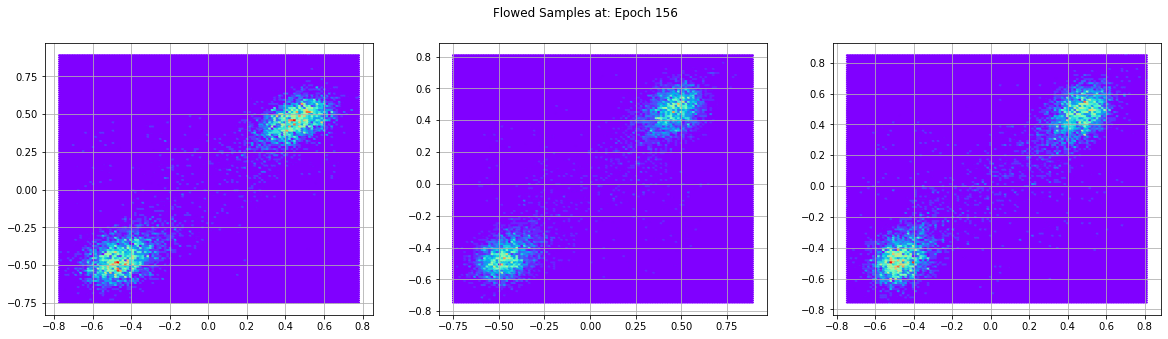

[ Epoch  156 ]:: ( Train Avg. Over Epoch ) = 76.03269725199623, ( Generalization ) = 75.33919748948126
[ ======== ]:: Report Learning Rate =  0.00017541959178173617
[ ======== ]:: Report Norm of Gradient =  186.5746373766196
[ #### ]:: In training ...  ... (epoch157=>batch0)
[ #### ]:: In training ...  ... (epoch157=>batch10)
[ #### ]:: In training ...  ... (epoch157=>batch20)
[ #### ]:: In training ...  ... (epoch157=>batch30)
[ #### ]:: In training ...  ... (epoch157=>batch40)
[ #### ]:: In training ...  ... (epoch157=>batch50)
[ #### ]:: In training ...  ... (epoch157=>batch60)
[ #### ]:: In training ...  ... (epoch157=>batch70)
[ #### ]:: In training ...  ... (epoch157=>batch80)
[ #### ]:: In training ...  ... (epoch157=>batch90)
[ #### ]:: In training ...  ... (epoch157=>batch100)
[ #### ]:: In training ...  ... (epoch157=>batch110)
[ #### ]:: In training ...  ... (epoch157=>batch120)
[ #### ]:: In training ...  ... (epoch157=>batch130)
[ #### ]:: In training ...  ... (epoch157=>b

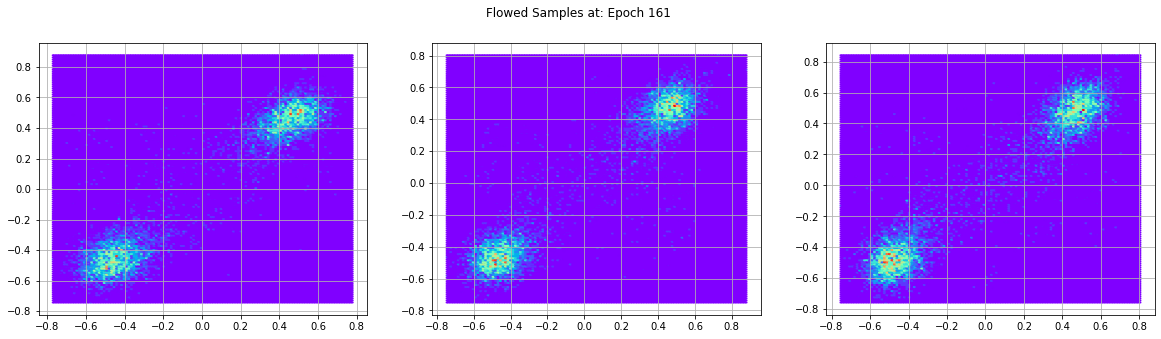

[ Epoch  161 ]:: ( Train Avg. Over Epoch ) = 75.87840527584653, ( Generalization ) = 75.30996618010094
[ ======== ]:: Report Learning Rate =  0.00016225624927410028
[ ======== ]:: Report Norm of Gradient =  356.24762830042914
[ #### ]:: In training ...  ... (epoch162=>batch0)
[ #### ]:: In training ...  ... (epoch162=>batch10)
[ #### ]:: In training ...  ... (epoch162=>batch20)
[ #### ]:: In training ...  ... (epoch162=>batch30)
[ #### ]:: In training ...  ... (epoch162=>batch40)
[ #### ]:: In training ...  ... (epoch162=>batch50)
[ #### ]:: In training ...  ... (epoch162=>batch60)
[ #### ]:: In training ...  ... (epoch162=>batch70)
[ #### ]:: In training ...  ... (epoch162=>batch80)
[ #### ]:: In training ...  ... (epoch162=>batch90)
[ #### ]:: In training ...  ... (epoch162=>batch100)
[ #### ]:: In training ...  ... (epoch162=>batch110)
[ #### ]:: In training ...  ... (epoch162=>batch120)
[ #### ]:: In training ...  ... (epoch162=>batch130)
[ #### ]:: In training ...  ... (epoch162=>

In [ ]:
# load tensorizing flow dataset
ginz_tf_dataset = utils.datasets.TensorizingFlowDataset("gl1d_samples_rk3.mat")
# initialize NF model
ginz_flow = NormalizingFlow(dim=ginz_tf_dataset.dim, blocks=RESNET_BLOCKS2_GL1D, \
                            flow_length=8)
# target PDF function
ginz1d_log_pdf = ginzburg_landau1d_logpdf

# begin training
ginz1d_report = train(ginz_tf_dataset, ginz_flow, ginz1d_log_pdf, 
          num_epochs=500,
          batch_size=2**6,
          verbose=True,
          lr=2e-3, 
          use_scheduler=True,
          schedule_rate=0.9999)

## 2 NF + ResNet

In [ ]:
# load tensorizing flow dataset
ginz_tf_dataset_std_gaussian = utils.datasets.TensorizingFlowDataset("gl1d_samples_rk3.mat", gaussian_data=True)
# initialize NF model
ginz_flow_std_gaussian = NormalizingFlow(dim=ginz_tf_dataset_std_gaussian.dim, blocks=RESNET_BLOCKS2_GL1D, \
                            flow_length=4)
# target PDF function
ginz1d_log_pdf = ginzburg_landau1d_logpdf

# begin training
ginz1d_report_std_gaussian = train(ginz_tf_dataset_std_gaussian, ginz_flow_std_gaussian, ginz1d_log_pdf, 
          num_epochs=500,
          batch_size=2**9,
          verbose=True,
          lr=2e-4, 
          use_scheduler=True)